# EDA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('daily_sales_metrics.csv') # Загружаем датасет
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') # Преобразуем колонку с датами в нужный тип данных
df

,date,gmv,orders,sessions,marketing_spend,is_promo_active,day_of_week,day_of_year,week_of_year,month,year
0,2022-01-01,506994,1081,34861,25148,0,5,1,52,1,2022
1,2022-01-02,445834,819,32858,23769,0,6,2,52,1,2022
2,2022-01-03,348150,736,23081,22108,0,0,3,1,1,2022
3,2022-01-04,359418,872,25166,21757,0,1,4,1,1,2022
4,2022-01-05,381439,871,31082,21420,0,2,5,1,1,2022
...,...,...,...,...,...,...,...,...,...,...,...
1090,2024-12-26,891794,5410,171515,54332,0,3,361,52,12,2024
1091,2024-12-27,1011484,6330,219724,55346,0,4,362,52,12,2024
1092,2024-12-28,1064332,6767,229631,56839,0,5,363,52,12,2024
1093,2024-12-29,1150266,6829,223812,75393,1,6,364,52,12,2024


In [2]:
print(df.isnull().sum()) # Нет пропущенных значений в столбцах

date               0
gmv                0
orders             0
sessions           0
marketing_spend    0
is_promo_active    0
day_of_week        0
day_of_year        0
week_of_year       0
month              0
year               0
dtype: int64


In [3]:
print(df.duplicated().sum()) # Нет дубликатов среди строк

0


In [4]:
df.describe() # Смотрим на минимальные, максимальные и средние значения признаков. На первый взгляд всё в норме

,date,gmv,orders,sessions,marketing_spend,is_promo_active,day_of_week,day_of_year,week_of_year,month,year
count,1095,1.095000e+03,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.00000
mean,2023-07-02 00:00:00,8.287837e+05,3924.099543,126718.787215,41729.171689,0.053881,3.001826,183.000000,26.523288,6.516895,2023.00000
min,2022-01-01 00:00:00,2.880060e+05,736.000000,23081.000000,17934.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2022.00000
25%,2022-10-01 12:00:00,6.512695e+05,2377.500000,79303.000000,32603.000000,0.000000,1.000000,92.000000,13.500000,4.000000,2022.00000
50%,2023-07-02 00:00:00,8.058020e+05,3959.000000,123874.000000,40300.000000,0.000000,3.000000,183.000000,27.000000,7.000000,2023.00000
75%,2024-03-31 12:00:00,9.789980e+05,5292.500000,167948.500000,48873.000000,0.000000,5.000000,274.000000,40.000000,10.000000,2024.00000
max,2024-12-30 00:00:00,1.698764e+06,9253.000000,304300.000000,91841.000000,1.000000,6.000000,365.000000,52.000000,12.000000,2024.00000
std,NaN,2.348056e+05,1731.068851,56433.429110,11726.318302,0.225886,2.003196,105.414174,15.053930,3.448158,0.81687


Посмотрим на распределение GMV

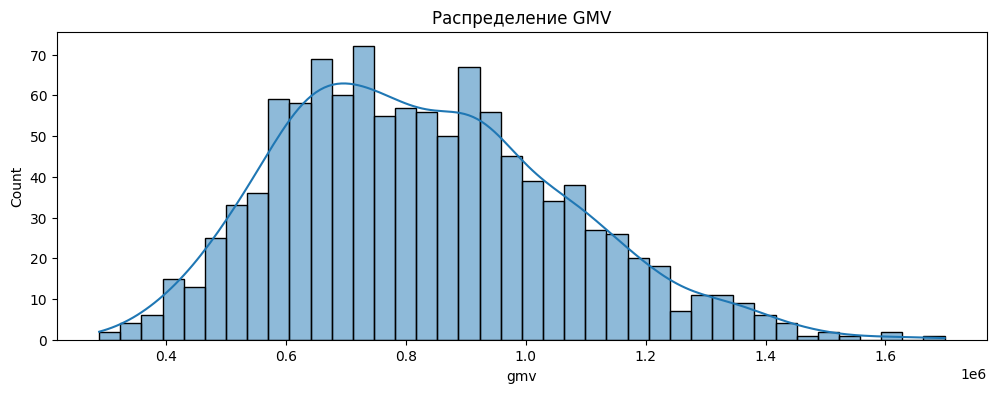

In [5]:
plt.figure(figsize=(12, 4))
sns.histplot(df['gmv'], kde=True, bins=40)
plt.title('Распределение GMV')
plt.show()

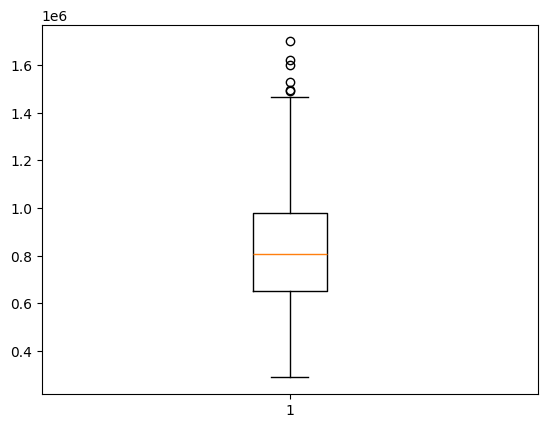

In [6]:
plt.boxplot(df['gmv'])
plt.show()

На графике мы видим 6 точек-выбросов. Посмотрим, что это за объекты.

In [7]:
Q1 = df['gmv'].quantile(0.25)
Q3 = df['gmv'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['gmv'] > upper_bound)]
print(outliers)

           date      gmv  orders  sessions  marketing_spend  is_promo_active  \
573  2023-07-28  1698764    5561    195556            49875                0   
847  2024-04-27  1620170    7406    215434            79871                1   
882  2024-06-01  1601092    8868    304300            91841                1   
903  2024-06-22  1493832    7854    238958            63425                0   
917  2024-07-06  1530583    7735    261388            72302                0   
1020 2024-10-17  1488764    6657    233758            82951                1   

      day_of_week  day_of_year  week_of_year  month  year  
573             4          209            30      7  2023  
847             5          118            17      4  2024  
882             5          153            22      6  2024  
903             5          174            25      6  2024  
917             5          188            27      7  2024  
1020            3          291            42     10  2024  


Видно, что аномально высокий GMV чаще наблюдался в субботу. Посмотрим на зависимость GMV от дня недели.

In [8]:
gmv_by_day = df.groupby('day_of_week')['gmv'].agg(['mean', 'median', 'std', 'count'])
print(gmv_by_day)

                      mean    median            std  count
day_of_week                                               
0            708952.649682  668036.0  189362.256551    157
1            755640.435897  726630.5  198309.107191    156
2            788503.397436  760231.0  218966.895753    156
3            824159.326923  795344.0  222836.645742    156
4            888235.750000  862676.0  232942.745214    156
5            979032.273885  945083.0  253038.202797    157
6            856589.012739  821679.0  219801.942712    157


Видим, что GMV в среднем и по медиане растет в течение недели, достигает максимума в субботу и снижается в воскресенье.

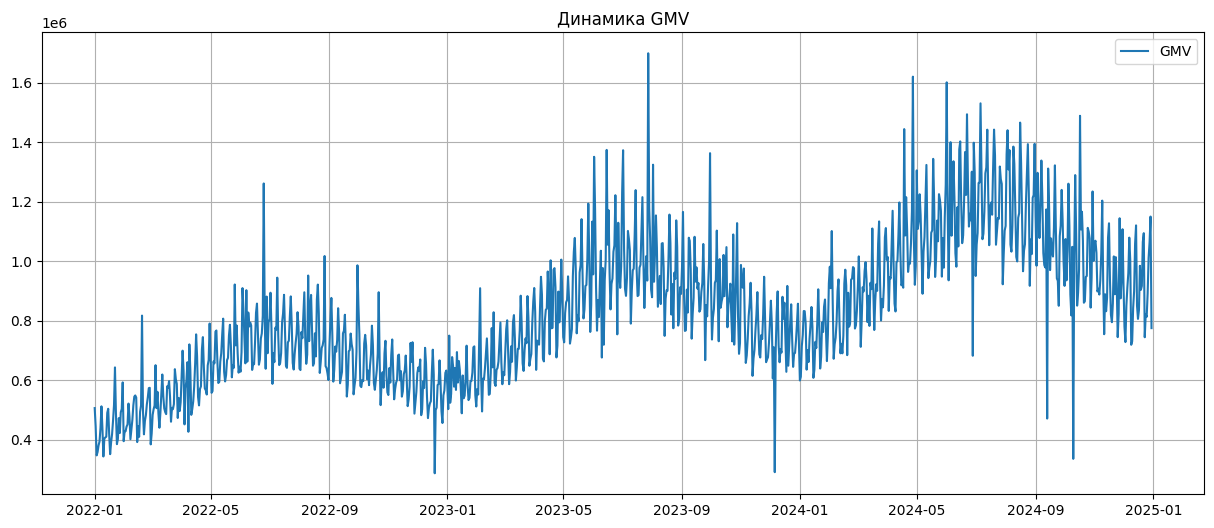

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['gmv'], label='GMV')
plt.title('Динамика GMV')
plt.legend()
plt.grid()
plt.show()

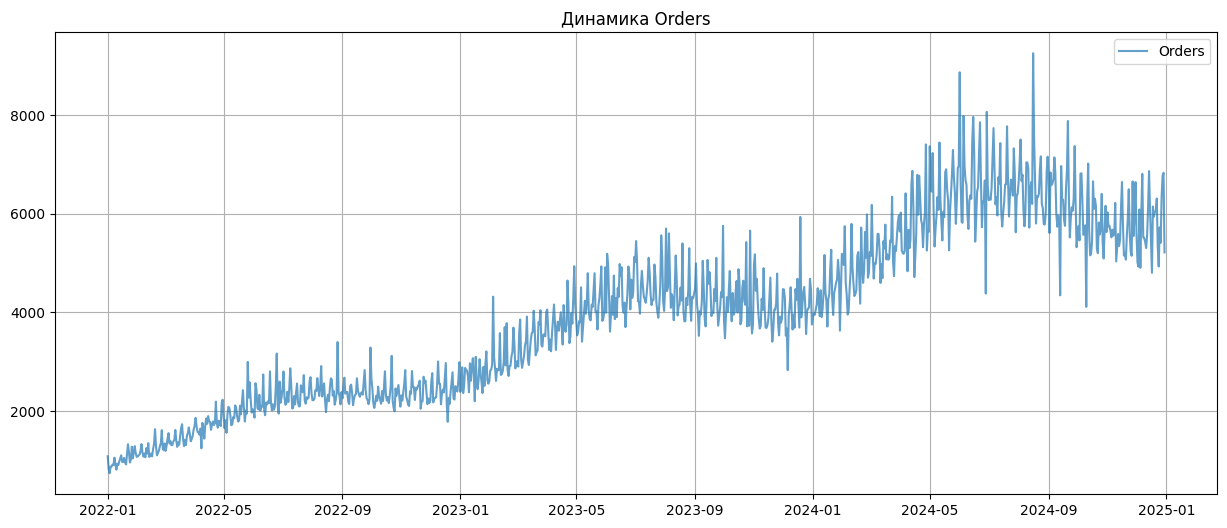

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['orders'], label='Orders', alpha=0.7)
plt.title('Динамика Orders')
plt.legend()
plt.grid()
plt.show()

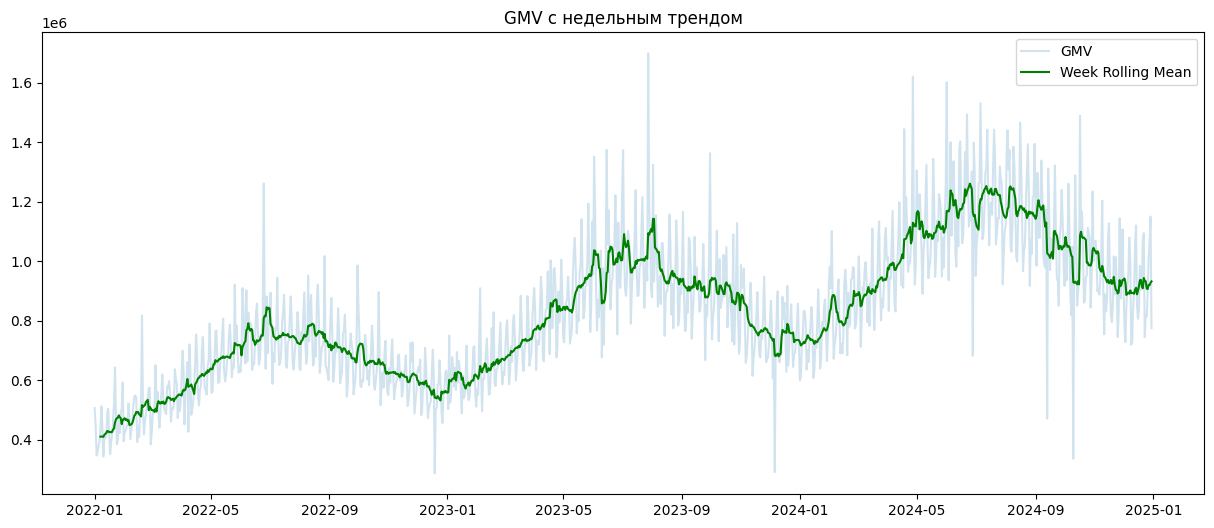

In [11]:
df['gmv_rolling_week'] = df['gmv'].rolling(window=7).mean()
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['gmv'], label='GMV', alpha=0.2)
plt.plot(df['date'], df['gmv_rolling_week'], label='Week Rolling Mean', color='green')
plt.title('GMV с недельным трендом')
plt.legend()
plt.show()

Посмотрим на автокорреляцию в GVM

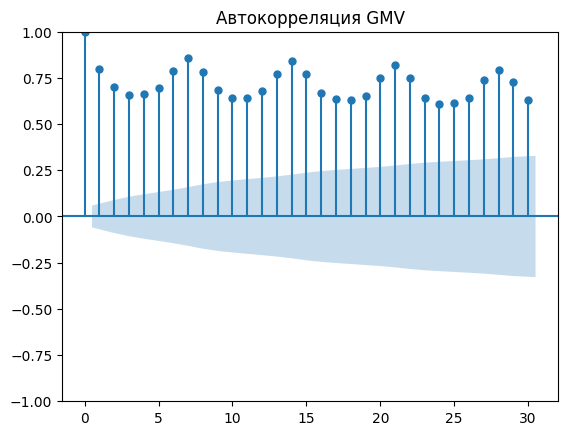

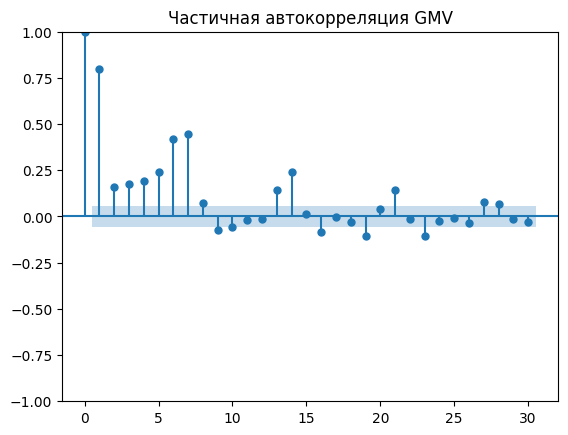

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['gmv'], lags=30, title='Автокорреляция GMV')
plot_pacf(df['gmv'], lags=30, title='Частичная автокорреляция GMV')
plt.show()

Мы видим, что на первом графике все лаги статистически значимы, а максимальные значения на 7, 14, 21 и 28 лагах. Следовательно, есть долгосрочный тренд роста GMV и недельная сезонность.   
Второй график резко обрывается на лаге 8 - это можно использовать как порядок авторегрессии.

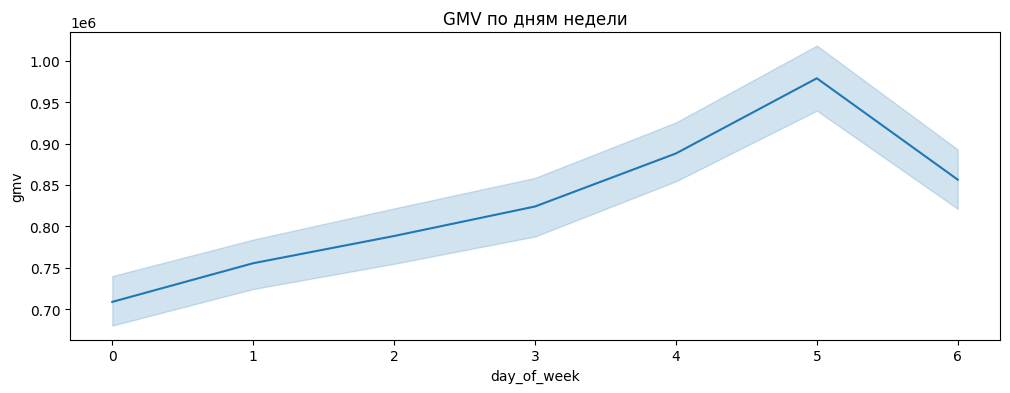

In [13]:
# Посмотрим на недельную сезонность
plt.figure(figsize=(12, 4))
sns.lineplot(x='day_of_week', y='gmv', data=df)
plt.title('GMV по дням недели')
plt.show()

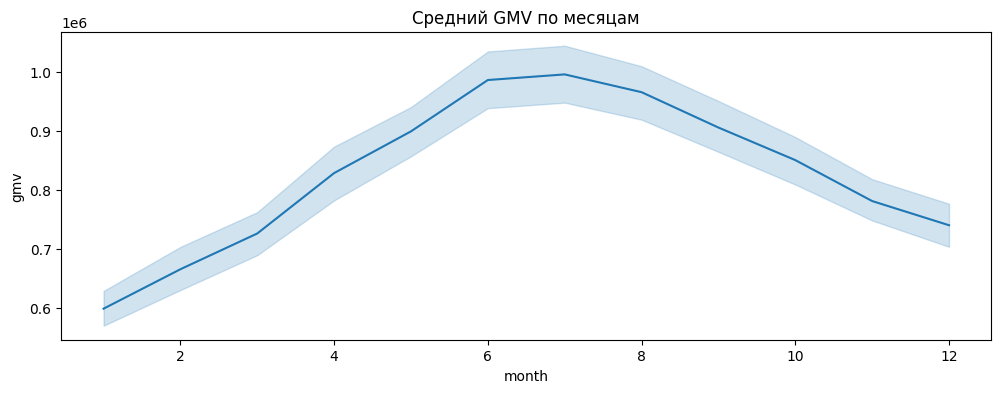

In [14]:
# И сезонность по месяцам
plt.figure(figsize=(12, 4))
sns.lineplot(x='month', y='gmv', data=df, estimator='mean')
plt.title('Средний GMV по месяцам')
plt.show()

Действительно, в субботу GMV достигает максимума за неделю. Также он растет от начала года до июня и июля, а затем постепенно снижается.

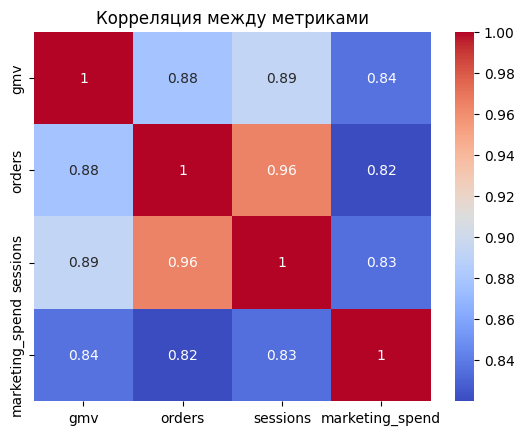

In [15]:
# Построим матрицу корреляций
corr = df[['gmv', 'orders', 'sessions', 'marketing_spend']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция между метриками')
plt.show()

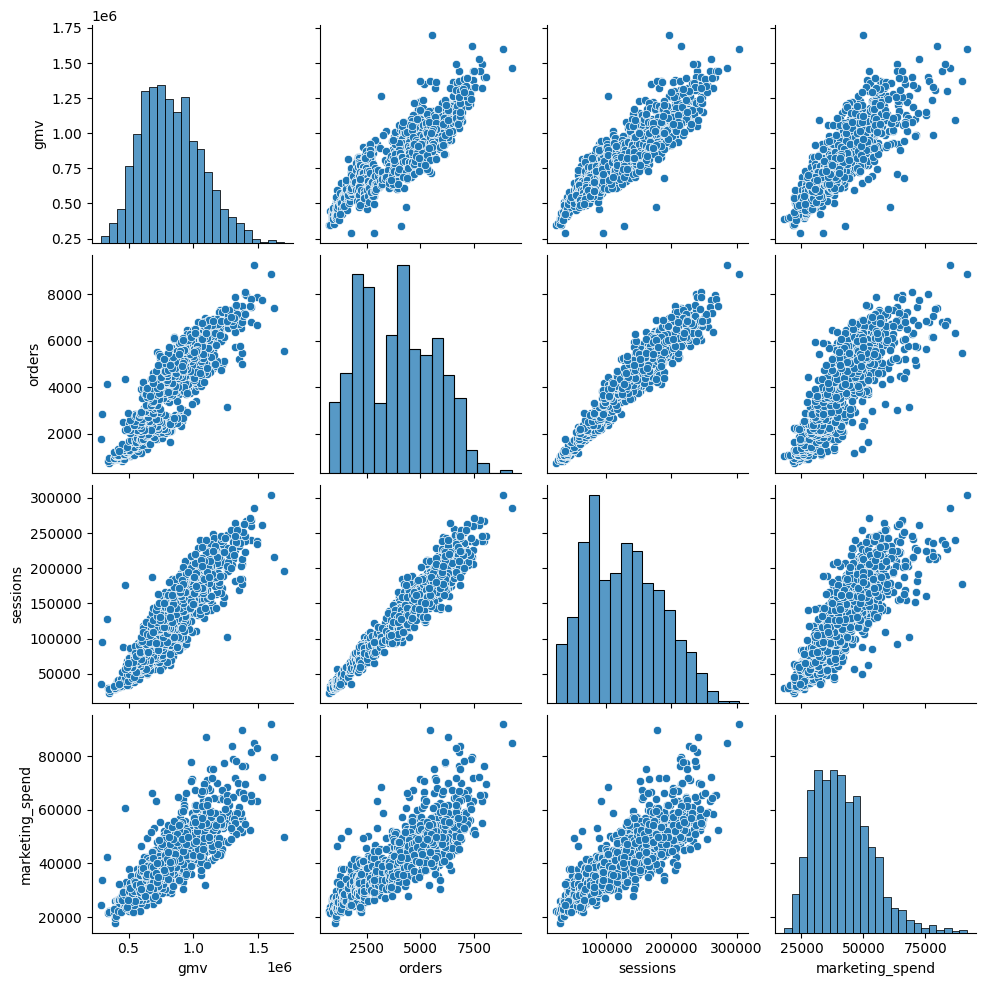

In [16]:
sns.pairplot(df[['gmv', 'orders', 'sessions', 'marketing_spend']])
plt.show()

Видим, что все метрики довольно сильно коррелируют, что предсказуемо. Нелинейных зависимостей и кластеров не обнаружено.

Выводы из EDA:   
Есть долгосрочный тренд роста GMV   
Есть недельная сезонность (пик в субботу)
Есть сезонность по месяцам (пик в июне и июле)   
Метрики сильно линейно зависимы   
Есть очень малое число выбросов (большинство объясняется недельной сезонность)

# Feature Engineering

In [17]:
# Добавим признак лагов для GMV
for lag in [1, 2, 3, 7, 14, 30]:
    df[f'gmv_lag_{lag}'] = df['gmv'].shift(lag)

In [18]:
# Посмотрим, есть ли NaN после добавления признаков
df.iloc[0:2]

,date,gmv,orders,sessions,marketing_spend,is_promo_active,day_of_week,day_of_year,week_of_year,month,year,gmv_rolling_week,gmv_lag_1,gmv_lag_2,gmv_lag_3,gmv_lag_7,gmv_lag_14,gmv_lag_30
0,2022-01-01,506994,1081,34861,25148,0,5,1,52,1,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-02,445834,819,32858,23769,0,6,2,52,1,2022,NaN,506994.0,NaN,NaN,NaN,NaN,NaN


In [19]:
# Удалим строки с NaN
df = df.dropna()
df = df.reset_index(drop=True) # Обновим индексы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1065 non-null   datetime64[ns]
 1   gmv               1065 non-null   int64         
 2   orders            1065 non-null   int64         
 3   sessions          1065 non-null   int64         
 4   marketing_spend   1065 non-null   int64         
 5   is_promo_active   1065 non-null   int64         
 6   day_of_week       1065 non-null   int64         
 7   day_of_year       1065 non-null   int64         
 8   week_of_year      1065 non-null   int64         
 9   month             1065 non-null   int64         
 10  year              1065 non-null   int64         
 11  gmv_rolling_week  1065 non-null   float64       
 12  gmv_lag_1         1065 non-null   float64       
 13  gmv_lag_2         1065 non-null   float64       
 14  gmv_lag_3         1065 n

Добавим ещё несколько признаков - скользящие статистики

In [20]:
df['gmv_rolling_mean_7'] = df['gmv'].rolling(window=7).mean() # Скользящее среднее за 7 дней
df['gmv_rolling_std_14'] = df['gmv'].rolling(window=14).std() # Скользящее стандартное отклонение за 14 дней
df['gmv_rolling_min_7'] = df['gmv'].rolling(window=7).min() # Скользящий минимум
df['gmv_rolling_max_7'] = df['gmv'].rolling(window=7).max() # Скользящий максимум

df = df.dropna() # Удалим строки с NaN
df = df.reset_index(drop=True) # Обновим индексы
df.head(7)

,date,gmv,orders,sessions,marketing_spend,is_promo_active,day_of_week,day_of_year,week_of_year,month,...,gmv_lag_1,gmv_lag_2,gmv_lag_3,gmv_lag_7,gmv_lag_14,gmv_lag_30,gmv_rolling_mean_7,gmv_rolling_std_14,gmv_rolling_min_7,gmv_rolling_max_7
0,2022-02-13,542530,1068,43326,27618,0,6,44,6,2,...,549419.0,545434.0,515743.0,478516.0,593272.0,490823.0,494018.571429,53847.905855,402472.0,549419.0
1,2022-02-14,392822,1089,34683,23384,0,0,45,7,2,...,542530.0,549419.0,545434.0,402472.0,395758.0,504636.0,492640.000000,54172.779189,392822.0,549419.0
2,2022-02-15,445781,1136,37583,22308,0,1,46,7,2,...,392822.0,542530.0,549419.0,435467.0,428248.0,418899.0,494113.428571,53281.911009,392822.0,549419.0
3,2022-02-16,410474,1079,39999,23441,0,2,47,7,2,...,445781.0,392822.0,542530.0,467065.0,429500.0,352212.0,486029.000000,54703.988180,392822.0,549419.0
4,2022-02-17,494744,1228,40882,27776,0,3,48,7,2,...,410474.0,445781.0,392822.0,515743.0,444766.0,392232.0,483029.142857,54436.222993,392822.0,549419.0
5,2022-02-18,516170,1336,48750,28953,0,4,49,7,2,...,494744.0,410474.0,445781.0,545434.0,452145.0,419599.0,478848.571429,55023.855124,392822.0,549419.0
6,2022-02-19,817646,1629,62673,52028,1,5,50,7,2,...,516170.0,494744.0,410474.0,549419.0,522158.0,464708.0,517166.714286,105757.653505,392822.0,817646.0


In [21]:
# Применим one-hot-encoding к дням недели и месяцам
df = pd.get_dummies(df, columns=['day_of_week'], prefix='day', dtype=int)
df = pd.get_dummies(df, columns=['month'], prefix='month', dtype=int)

In [22]:
# Сделаем циклическое кодирование номеров дней и недель в году, так как они имею циклическую природу
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
df['week_of_year_sin'] = np.sin(2 * np.pi * df['week_of_year'] / 52)
df['week_of_year_cos'] = np.cos(2 * np.pi * df['week_of_year'] / 52)

In [23]:
df.head()

,date,gmv,orders,sessions,marketing_spend,is_promo_active,day_of_year,week_of_year,year,gmv_rolling_week,...,month_7,month_8,month_9,month_10,month_11,month_12,day_of_year_sin,day_of_year_cos,week_of_year_sin,week_of_year_cos
0,2022-02-13,542530,1068,43326,27618,0,44,6,2022,494018.571429,...,0,0,0,0,0,0,0.687053,0.726608,0.663123,0.748511
1,2022-02-14,392822,1089,34683,23384,0,45,7,2022,492640.000000,...,0,0,0,0,0,0,0.699458,0.714673,0.748511,0.663123
2,2022-02-15,445781,1136,37583,22308,0,46,7,2022,494113.428571,...,0,0,0,0,0,0,0.711657,0.702527,0.748511,0.663123
3,2022-02-16,410474,1079,39999,23441,0,47,7,2022,486029.000000,...,0,0,0,0,0,0,0.723644,0.690173,0.748511,0.663123
4,2022-02-17,494744,1228,40882,27776,0,48,7,2022,483029.142857,...,0,0,0,0,0,0,0.735417,0.677615,0.748511,0.663123


Добавим маркетинговые признаки

In [24]:
# Скользящая сумма маркетинговых затрат за 7 дней
df['marketing_spend_rolling_sum_7'] = df['marketing_spend'].rolling(window=7).sum()
# Эффективность маркетинга (GMV / Marketing Spend)
df['marketing_roi'] = df['gmv'] / (df['marketing_spend'] + 0.001)

# Выбор и обучение модели

In [25]:
# Подготовка данных
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train = train.drop(['gmv', 'date'], axis=1)
y_train = train['gmv']
X_test = test.drop(['gmv', 'date'], axis=1)
y_test = test['gmv']

Почему LGBM?
1. Модель может находить нелинейные зависимости
2. Модель хорошо учитывает признаки разной природы, например, маркетинговые
3. Современное решение для прогнозирования

In [26]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit

# Настройка временных фолдов
tscv = TimeSeriesSplit(n_splits=3)

# Создаем модель
lgb_model = LGBMRegressor(boosting_type='gbdt', verbosity=-1)

# Сетка параметров
param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'feature_fraction': [0.8, 0.9, 1.0]
}

# Настройка GridSearch
grid = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

# Запуск подбора
grid.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid.best_params_)
best_model = grid.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Лучшие параметры: {'feature_fraction': 1.0, 'learning_rate': 0.05, 'n_estimators': 500, 'num_leaves': 15}


MAPE на тестовых данных: 6.74%


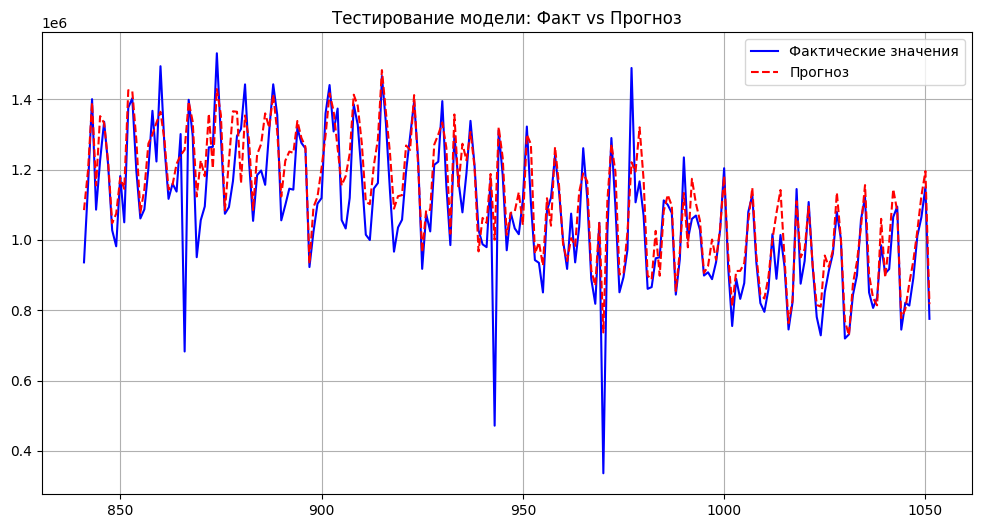

In [27]:
# Предсказание для тестовых данных
y_test_pred = best_model.predict(X_test)

# Расчет MAPE
test_mape = mape(y_test, y_test_pred) * 100
print(f"MAPE на тестовых данных: {test_mape:.2f}%")

# Визуализация факта vs прогноза
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Фактические значения', color='blue')
plt.plot(test.index, y_test_pred, label='Прогноз', color='red', linestyle='--')
plt.title('Тестирование модели: Факт vs Прогноз')
plt.legend()
plt.grid()
plt.show()

Метрика MAPE 6.47% - практически идеальный результат.   
Она показывает, что модель отлично обощает данные и учитывает разные признаки.

Сделаем прогноз на следующие 7 дней рекуррентным способом

In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 841 to 1051
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   orders                         211 non-null    int64  
 1   sessions                       211 non-null    int64  
 2   marketing_spend                211 non-null    int64  
 3   is_promo_active                211 non-null    int64  
 4   day_of_year                    211 non-null    int64  
 5   week_of_year                   211 non-null    int64  
 6   year                           211 non-null    int64  
 7   gmv_rolling_week               211 non-null    float64
 8   gmv_lag_1                      211 non-null    float64
 9   gmv_lag_2                      211 non-null    float64
 10  gmv_lag_3                      211 non-null    float64
 11  gmv_lag_7                      211 non-null    float64
 12  gmv_lag_14                     211 non-null    

Ошибка при прогнозировании: 0


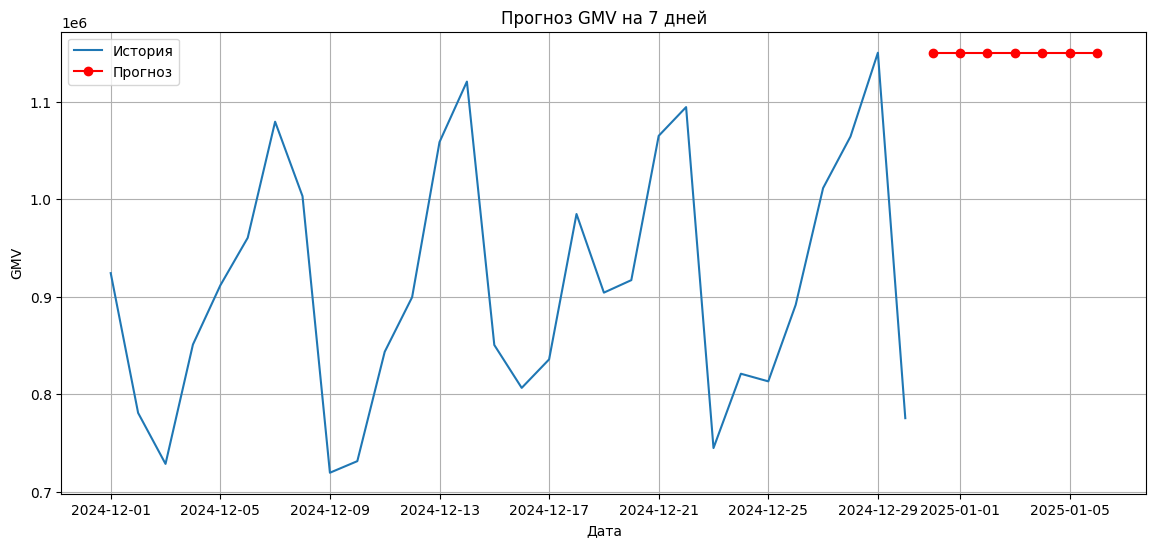

Прогнозируемые значения GMV на 7 дней:
        date  gmv_forecast
0 2024-12-31     1150266.0
1 2025-01-01     1150266.0
2 2025-01-02     1150266.0
3 2025-01-03     1150266.0
4 2025-01-04     1150266.0
5 2025-01-05     1150266.0
6 2025-01-06     1150266.0


In [ ]:
def make_forecast(model, last_window, steps=7):
    forecast = []
    current_data = last_window.copy()
    
    for _ in range(steps):
        # 1. Делаем прогноз на следующий день
        next_pred = model.predict(current_data.tail(1))[0]
        forecast.append(next_pred)
        
        # 2. Создаем новую строку данных
        new_row = current_data.tail(1).copy()
        
        # 3. Обновляем лаги GMV
        new_row['gmv_lag_1'] = next_pred
        if len(current_data) > 1:
            new_row['gmv_lag_2'] = current_data['gmv_lag_1'].iloc[-1]
            new_row['gmv_lag_3'] = current_data['gmv_lag_2'].iloc[-1] if len(current_data) > 2 else current_data['gmv_lag_1'].iloc[-1]
            new_row['gmv_lag_7'] = current_data['gmv_lag_1'].iloc[-6] if len(current_data) > 6 else current_data['gmv_lag_1'].iloc[-1]
            new_row['gmv_lag_14'] = current_data['gmv_lag_1'].iloc[-13] if len(current_data) > 13 else current_data['gmv_lag_1'].iloc[-1]
            new_row['gmv_lag_30'] = current_data['gmv_lag_1'].iloc[-29] if len(current_data) > 29 else current_data['gmv_lag_1'].iloc[-1]
        
        # 4. Обновляем скользящие статистики GMV
        last_values = [current_data['gmv_lag_1'].iloc[-i] for i in range(1, min(8, len(current_data)+1))][::-1]
        if len(last_values) < 7:
            last_values = [current_data['gmv_lag_1'].iloc[-1]] * (7 - len(last_values)) + last_values
        last_values.append(next_pred)
        
        new_row['gmv_rolling_mean_7'] = np.mean(last_values[-7:])
        new_row['gmv_rolling_std_14'] = np.std(last_values[-14:]) if len(last_values) >= 14 else np.std(last_values)
        new_row['gmv_rolling_min_7'] = np.min(last_values[-7:])
        new_row['gmv_rolling_max_7'] = np.max(last_values[-7:])
        new_row['gmv_rolling_week'] = np.mean(last_values[-7:])
        
        # 5. Обновляем календарные фичи
        new_row['day_of_year'] = (new_row['day_of_year'].iloc[-1] + 1) % 366
        new_row['week_of_year'] = (new_row['week_of_year'].iloc[-1] + 1) % 53
        new_row['year'] = new_row['year'].iloc[-1] + (1 if new_row['day_of_year'].iloc[-1] == 1 else 0)
        
        # 6. Обновляем one-hot encoded дни недели
        day_cols = [col for col in current_data.columns if col.startswith('day_')]
        if day_cols:
            current_day = new_row[day_cols].idxmax(axis=1)[0]
            next_day = (int(current_day.split('_')[1]) + 1) % 7
            new_row[day_cols] = 0
            new_row[f'day_{next_day}'] = 1
        
        # 7. Обновляем маркетинговые метрики
        new_row['marketing_spend'] = current_data['marketing_spend'].mean()
        new_row['marketing_spend_rolling_sum_7'] = current_data['marketing_spend'].iloc[-7:].sum() if len(current_data) >= 7 else current_data['marketing_spend'].sum()
        new_row['marketing_roi'] = next_pred / (new_row['marketing_spend'].iloc[-1] + 1e-6)
        
        # 8. Добавляем новую строку
        current_data = pd.concat([current_data, new_row])
    
    return forecast

# Берем последние 30 дней для инициализации
last_window_size = min(30, len(X_test))
last_window = X_test.iloc[-last_window_size:].copy()

# Проверяем, что last_window содержит все нужные колонки
required_columns = best_model.feature_name_ if hasattr(best_model, 'feature_name_') else X_test.columns
last_window = last_window[required_columns]

# Делаем прогноз
try:
    forecast_values = make_forecast(best_model, last_window, steps=7)
except Exception as e:
    print(f"Ошибка при прогнозировании: {e}")
    # Альтернативный вариант - использовать последнее известное значение
    forecast_values = [last_window['gmv_lag_1'].iloc[-1]] * 7

# Создаем даты для прогноза
last_date = df['date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

# Визуализация
plt.figure(figsize=(14, 6))
plt.plot(df['date'].tail(30), df['gmv'].tail(30), label='История')
plt.plot(future_dates, forecast_values, 'ro-', label='Прогноз')
plt.title('Прогноз GMV на 7 дней')
plt.xlabel('Дата')
plt.ylabel('GMV')
plt.legend()
plt.grid()
plt.show()

# Результаты
forecast_df = pd.DataFrame({
    'date': future_dates,
    'gmv_forecast': forecast_values
})
print("Прогнозируемые значения GMV на 7 дней:")
print(forecast_df)

Снова сделаем прогноз на тестовой выборке и найдем аномалии

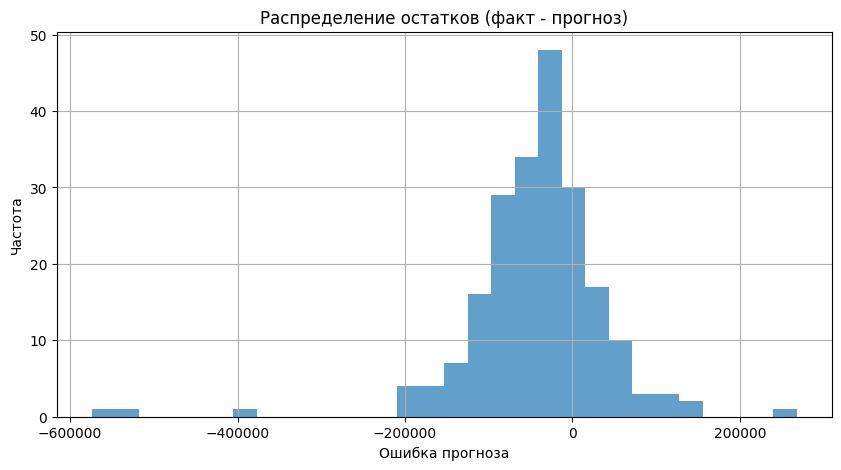

In [46]:
test_predictions = best_model.predict(X_test)

# Вычисляем остатки
residuals = y_test - test_predictions

plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, alpha=0.7)
plt.title('Распределение остатков (факт - прогноз)')
plt.xlabel('Ошибка прогноза')
plt.ylabel('Частота')
plt.grid()
plt.show()

Определим порог аномалий

In [56]:
std_residuals = np.std(residuals)
for K in [1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0]:
    threshold = K * std_residuals
    anomalies = np.abs(residuals) > threshold
    print(f"K={K}: {sum(anomalies)} аномалий")

K=1.0: 52 аномалий
K=1.5: 18 аномалий
K=2.0: 10 аномалий
K=2.5: 4 аномалий
K=3.0: 4 аномалий
K=4.0: 3 аномалий
K=5.0: 2 аномалий


На графике ниже мы видим, что явных аномалий ровно 4. Поэтому выбираем K = 2.5, соотвествующий этому количеству аномалий

In [ ]:
threshold = 2.5

In [48]:
anomalies = np.abs(residuals) > threshold # Аномальные объекты

results = pd.DataFrame({
    'date': test['date'],
    'gmv_actual': y_test,
    'gmv_pred': test_predictions,
    'residual': residuals,
    'is_anomaly': anomalies
})

print("Найденные аномалии:")
print(results[results['is_anomaly']].sort_values('residual', ascending=False))

Найденные аномалии:
          date  gmv_actual      gmv_pred       residual  is_anomaly
977 2024-10-17     1488764  1.220844e+06  267919.909013        True
970 2024-10-10      336499  7.368970e+05 -400398.038878        True
943 2024-09-13      471804  1.000286e+06 -528481.675912        True
866 2024-06-28      682731  1.256472e+06 -573741.412810        True


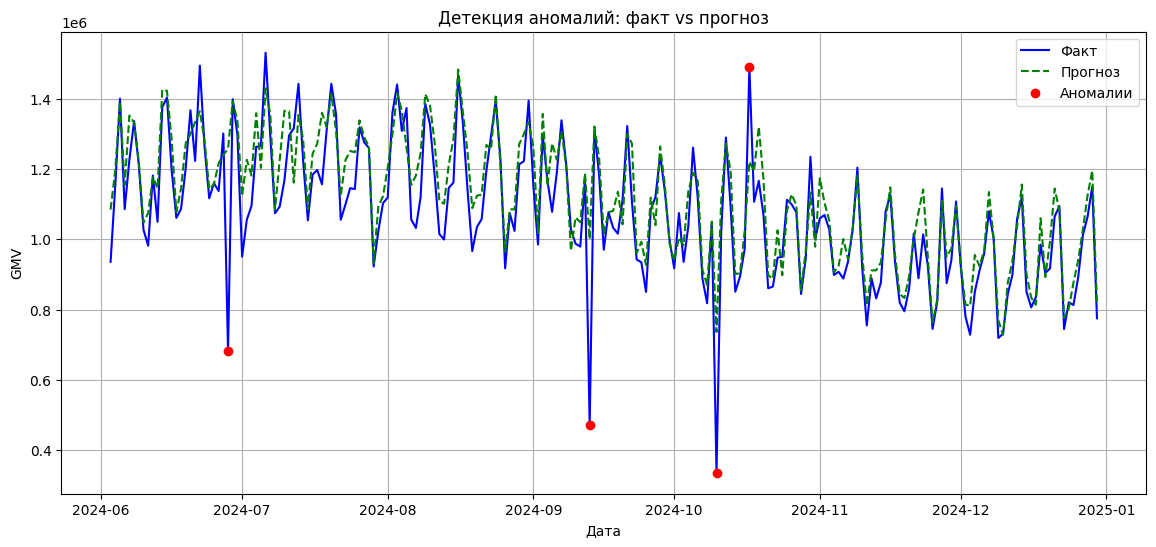

In [49]:
plt.figure(figsize=(14, 6))

# Фактические значения
plt.plot(results['date'], results['gmv_actual'], label='Факт', color='blue')

# Прогноз
plt.plot(results['date'], results['gmv_pred'], label='Прогноз', linestyle='--', color='green')

# Аномалии
anomaly_dates = results[results['is_anomaly']]['date']
anomaly_values = results[results['is_anomaly']]['gmv_actual']
plt.scatter(anomaly_dates, anomaly_values, color='red', label='Аномалии', zorder=5)

plt.title('Детекция аномалий: факт vs прогноз')
plt.xlabel('Дата')
plt.ylabel('GMV')
plt.legend()
plt.grid()
plt.show()

In [55]:
# Объединяем прогноз и детекцию аномалий
future_anomalies = np.abs(np.array(forecast_values) - np.mean(forecast_values)) > threshold

forecast_df['is_anomaly'] = future_anomalies
print("Прогноз с аномалиями:")
print(forecast_df)

Прогноз с аномалиями:
        date  gmv_forecast  is_anomaly
0 2024-12-31     1150266.0       False
1 2025-01-01     1150266.0       False
2 2025-01-02     1150266.0       False
3 2025-01-03     1150266.0       False
4 2025-01-04     1150266.0       False
5 2025-01-05     1150266.0       False
6 2025-01-06     1150266.0       False


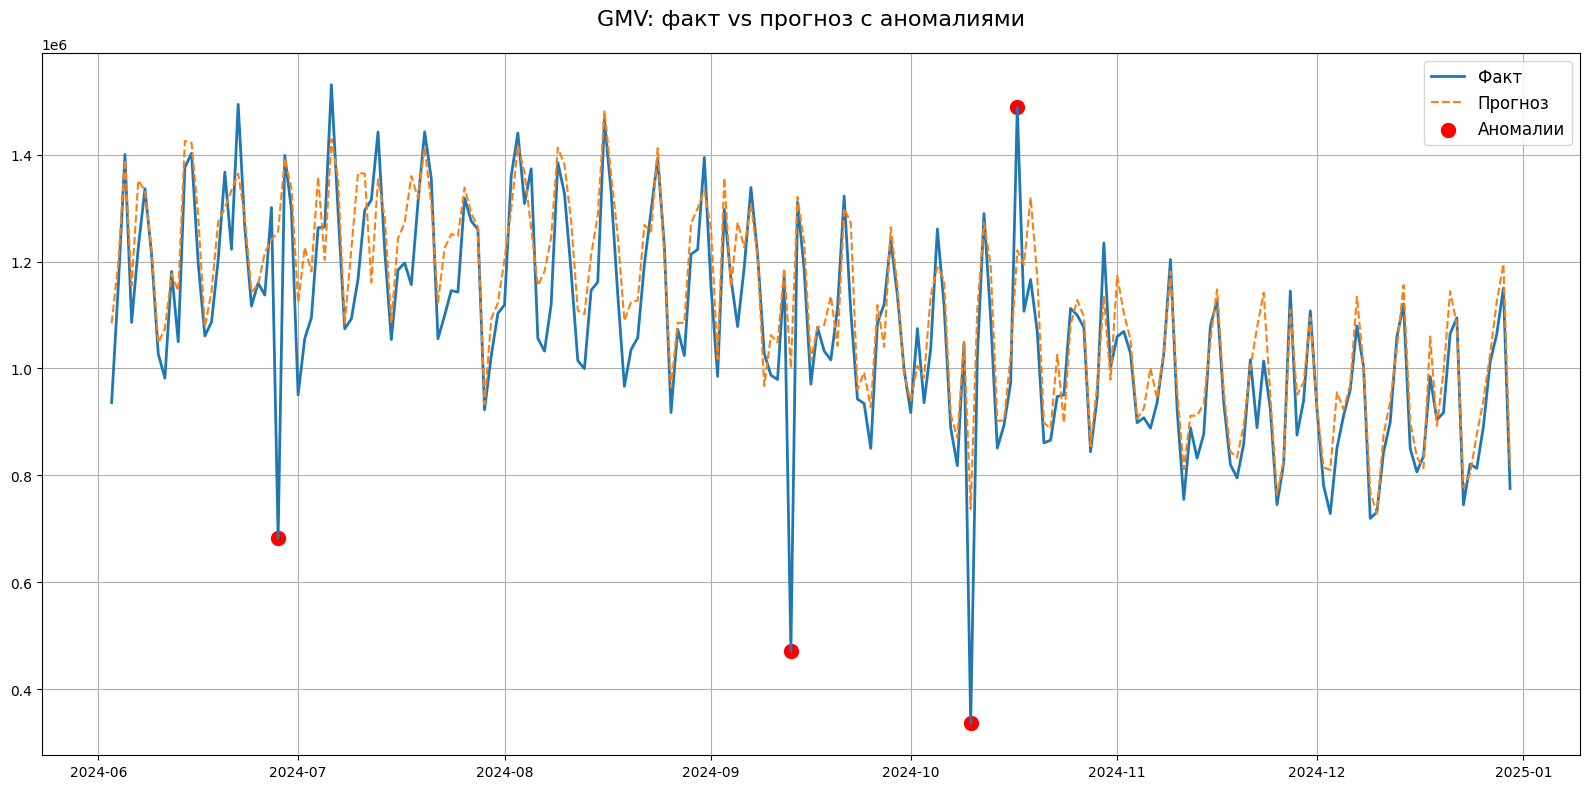

In [57]:
metrics = {
    'MAPE на тесте': f"{mape(y_test, test_predictions)*100:.2f}%",
    'Обнаружено аномалий': f"{anomalies.sum()} ({anomalies.mean()*100:.1f}%)",
    'Порог аномалий (K)': K
}

# График с прогнозом и аномалиями
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(results['date'], results['gmv_actual'], label='Факт', linewidth=2)
ax.plot(results['date'], results['gmv_pred'], label='Прогноз', linestyle='--')
ax.scatter(anomaly_dates, anomaly_values, color='red', label='Аномалии', s=100)
ax.set_title('GMV: факт vs прогноз с аномалиями', pad=20, fontsize=16)
ax.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig('gmv_forecast_anomalies.png')
plt.show()